In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [29]:
df = pd.read_csv('../../data/finland/new_sample_plots_all_features.csv')

In [30]:
df.head()

,sampleplotid,clusterid,sampleplottype,measurementdate,center_x,center_y,center_z,mean_age_years,mean_dbh_cm,mean_height_m,...,era5_consecutive_dry_days_index_per_time_period,era5_number_of_cdd_periods_with_more_than_5days_per_time_period,era5_consecutive_wet_days_index_per_time_period,era5_number_of_cwd_periods_with_more_than_5days_per_time_period,era5_precipitation_days_index_per_time_period,era5_wet_days_index_per_time_period,era5_highest_one_day_precipitation_amount_per_time_period,era5_highest_five_day_precipitation_amount_per_time_period,era5_number_of_5day_heavy_precipitation_periods_per_time_period,era5_simple_daily_intensity_index_per_time_period
0,639971,48070005,1,2017-08-14,393888.00,7401168.00,0.00,39,9.20,9.10,...,29.0,238.0,32.0,58.0,2545.0,2545.0,64.8069,64.8069,31.0,5.203801
1,718519,47110091,1,2018-07-18,576046.89,7395714.46,346.79,66,16.41,9.95,...,25.0,189.0,32.0,72.0,2834.0,2834.0,64.8069,64.8069,31.0,4.927450
2,104636,40110069,1,2011-09-26,573195.59,7037602.47,197.03,72,23.75,17.73,...,40.0,190.0,31.0,93.0,2954.0,2954.0,64.8069,64.8069,31.0,5.380295
3,265558,43116119,1,2013-08-29,594209.26,7181267.18,255.95,42,17.99,14.19,...,29.0,198.0,32.0,87.0,2879.0,2879.0,64.8069,64.8069,31.0,5.094967
4,696784,39100744,1,2018-08-13,546924.17,6997684.98,124.56,14,6.95,7.19,...,37.0,193.0,31.0,93.0,2894.0,2894.0,64.8069,64.8069,31.0,5.240105


In [31]:
df.columns

Index(['sampleplotid', 'clusterid', 'sampleplottype', 'measurementdate',
       'center_x', 'center_y', 'center_z', 'mean_age_years', 'mean_dbh_cm',
       'mean_height_m', 'main_species_en', 'total_m3_ha', 'pine_m3_ha',
       'spruce_m3_ha', 'birch_m3_ha', 'other_bl_m3_ha', 'pine_percent',
       'spruce_percent', 'birch_percent', 'other_bl_percent',
       'is_timber_defined', 'total_timber_m3_ha', 'pine_timber_m3_ha',
       'spruce_timber_m3_ha', 'birch_timber_m3_ha', 'other_bl_timber_m3_ha',
       'total_stems_ha', 'pine_stems_ha', 'spruce_stems_ha', 'birch_stems_ha',
       'other_bl_stems_ha', 'total_m2_ha', 'pine_m2_ha', 'spruce_m2_ha',
       'birch_m2_ha', 'other_bl_m2_ha', 'geometry',
       'uerra_consecutive_frost_days_index_per_time_period',
       'uerra_number_of_cfd_periods_with_more_than_5days_per_time_period',
       'uerra_frost_days_index_per_time_period',
       'uerra_consecutive_summer_days_index_per_time_period',
       'uerra_number_of_csu_periods_with_more_

In [32]:
columns = [c for c in df.columns if 'era5' in c]

In [33]:
columns

['era5_number_of_cfd_periods_with_more_than_5days_per_time_period',
 'era5_frost_days_index_per_time_period',
 'era5_number_of_csu_periods_with_more_than_5days_per_time_period',
 'era5_ice_days_index_per_time_period',
 'era5_summer_days_index_per_time_period',
 'era5_consecutive_dry_days_index_per_time_period',
 'era5_number_of_cdd_periods_with_more_than_5days_per_time_period',
 'era5_consecutive_wet_days_index_per_time_period',
 'era5_number_of_cwd_periods_with_more_than_5days_per_time_period',
 'era5_precipitation_days_index_per_time_period',
 'era5_wet_days_index_per_time_period',
 'era5_highest_one_day_precipitation_amount_per_time_period',
 'era5_highest_five_day_precipitation_amount_per_time_period',
 'era5_number_of_5day_heavy_precipitation_periods_per_time_period',
 'era5_simple_daily_intensity_index_per_time_period']

In [34]:
X = df[columns]

In [35]:
X.head()

,era5_number_of_cfd_periods_with_more_than_5days_per_time_period,era5_frost_days_index_per_time_period,era5_number_of_csu_periods_with_more_than_5days_per_time_period,era5_ice_days_index_per_time_period,era5_summer_days_index_per_time_period,era5_consecutive_dry_days_index_per_time_period,era5_number_of_cdd_periods_with_more_than_5days_per_time_period,era5_consecutive_wet_days_index_per_time_period,era5_number_of_cwd_periods_with_more_than_5days_per_time_period,era5_precipitation_days_index_per_time_period,era5_wet_days_index_per_time_period,era5_highest_one_day_precipitation_amount_per_time_period,era5_highest_five_day_precipitation_amount_per_time_period,era5_number_of_5day_heavy_precipitation_periods_per_time_period,era5_simple_daily_intensity_index_per_time_period
0,102.0,3783.0,76.0,2316.0,1527.0,29.0,238.0,32.0,58.0,2545.0,2545.0,64.8069,64.8069,31.0,5.203801
1,98.0,3897.0,76.0,2534.0,1345.0,25.0,189.0,32.0,72.0,2834.0,2834.0,64.8069,64.8069,31.0,4.927450
2,112.0,3362.0,91.0,1928.0,1859.0,40.0,190.0,31.0,93.0,2954.0,2954.0,64.8069,64.8069,31.0,5.380295
3,97.0,3554.0,80.0,2197.0,1615.0,29.0,198.0,32.0,87.0,2879.0,2879.0,64.8069,64.8069,31.0,5.094967
4,111.0,3036.0,80.0,1751.0,1852.0,37.0,193.0,31.0,93.0,2894.0,2894.0,64.8069,64.8069,31.0,5.240105


# Pine Classifier

In [36]:
df['target'] = np.where(df['pine_percent'] > 0.5, 1, 0)

In [37]:
y_pine = df['target']

In [38]:
X_pine_resampled, y_pine_resampled = SMOTE().fit_resample(X, y_pine)

In [39]:
X_pine_train, X_pine_test, y_pine_train, y_pine_test = train_test_split(X_pine_resampled, y_pine_resampled, train_size=0.7)

In [40]:
pine_parameters = {'n_estimators': [100], 'max_depth': [50, 75, 100]}

In [41]:
clf_pine = GridSearchCV(RandomForestClassifier(), cv=3, param_grid=pine_parameters, verbose=9)

In [42]:
clf_pine.fit(X_pine_train, y_pine_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=50, n_estimators=100, score=0.678, total=   3.2s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.674, total=   3.2s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.675, total=   3.3s
[CV] max_depth=75, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s remaining:    0.0s


[CV] ...... max_depth=75, n_estimators=100, score=0.676, total=   3.2s
[CV] max_depth=75, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.9s remaining:    0.0s


[CV] ...... max_depth=75, n_estimators=100, score=0.673, total=   3.4s
[CV] max_depth=75, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.3s remaining:    0.0s


[CV] ...... max_depth=75, n_estimators=100, score=0.673, total=   3.3s
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.6s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=100, score=0.677, total=   3.2s
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   22.8s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=100, score=0.674, total=   3.3s
[CV] max_depth=100, n_estimators=100 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   26.0s remaining:    0.0s


[CV] ..... max_depth=100, n_estimators=100, score=0.674, total=   3.2s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   29.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [43]:
y_pine_pred = clf_pine.predict(X_pine_test)

In [44]:
accuracy_score(y_pine_pred, y_pine_test)

0.6840128945410748

In [45]:
precision_score(y_pine_pred, y_pine_test)

0.6472503361879821

In [46]:
recall_score(y_pine_pred, y_pine_test)

0.6991055729684275

In [47]:
cm = confusion_matrix(y_pine_pred, y_pine_test)
cm

array([[10164,  4984],
       [ 3936,  9145]])

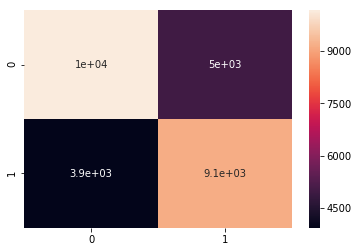

In [48]:
sn.heatmap(cm, annot=True)

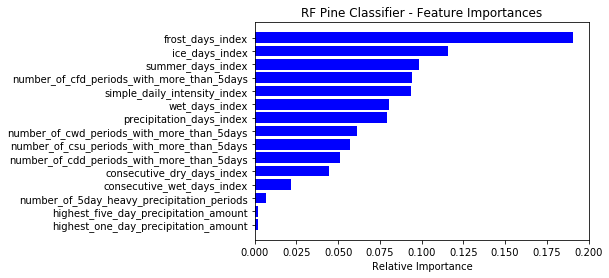

In [49]:
features = [c[5:-16] for c in X.columns]
importances = clf_pine.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('RF Pine Classifier - Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Spruce

In [50]:
df['target'] = np.where(df['spruce_percent'] > 0.5, 1, 0)

In [51]:
y_spruce = df['target']

In [52]:
X_spruce_resampled, y_spruce_resampled = SMOTE().fit_resample(X, y_spruce)

In [53]:
X_spruce_train, X_spruce_test, y_spruce_train, y_spruce_test = train_test_split(X_spruce_resampled, y_spruce_resampled, train_size=0.7)

In [54]:
spruce_parameters = {'n_estimators': [100], 'max_depth': [50, 75, 100]}

In [55]:
clf_spruce = GridSearchCV(RandomForestClassifier(), param_grid=spruce_parameters, cv=10, verbose=9)

In [56]:
clf_spruce.fit(X_spruce_train, y_spruce_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=50, n_estimators=100, score=0.656, total=   3.8s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.649, total=   3.7s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.644, total=   3.9s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.4s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.647, total=   3.8s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.1s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.656, total=   3.8s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.9s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.650, total=   3.7s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.6s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.649, total=   3.8s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   26.4s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.651, total=   3.8s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   30.2s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.653, total=   3.7s
[CV] max_depth=50, n_estimators=100 ..................................
[CV] ...... max_depth=50, n_estimators=100, score=0.655, total=   3.9s
[CV] max_depth=75, n_estimators=100 ..................................
[CV] ...... max_depth=75, n_estimators=100, score=0.657, total=   3.9s
[CV] max_depth=75, n_estimators=100 ..................................
[CV] ...... max_depth=75, n_estimators=100, score=0.649, total=   3.8s
[CV] max_depth=75, n_estimators=100 ..................................
[CV] ...... max_depth=75, n_estimators=100, score=0.642, total=   3.8s
[CV] max_depth=75, n_estimators=100 ..................................
[CV] ...... max_depth=75, n_estimators=100, score=0.645, total=   3.8s
[CV] max_depth=75, n_estimators=100 ..................................
[CV] ...... max_depth=75, n_estimators=100, score=0.658, total=   3.8s
[CV] max_depth=75, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [57]:
clf_spruce.best_params_

{'max_depth': 50, 'n_estimators': 100}

In [58]:
y_spruce_pred = clf_spruce.predict(X_spruce_test)

In [59]:
accuracy_score(y_spruce_pred, y_spruce_test)

0.651853575306344

In [60]:
precision_score(y_spruce_pred, y_spruce_test)

0.689500541209216

In [61]:
recall_score(y_spruce_pred, y_spruce_test)

0.642507204610951

In [62]:
cm = confusion_matrix(y_spruce_pred, y_spruce_test)
cm

array([[7892, 4016],
       [4962, 8918]])

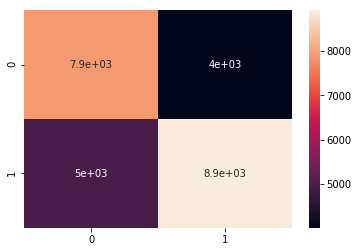

In [65]:
sn.heatmap(cm, annot=True)

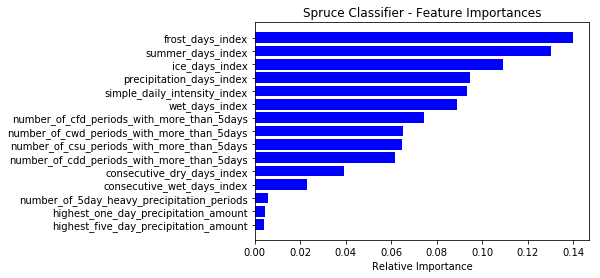

In [64]:
features = [c[5:-16] for c in X.columns]
importances = clf_spruce.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Spruce Classifier - Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()